In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd

In [11]:
# generate some colored gaussian noise
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

In [22]:
### Generate 128 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(1280 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

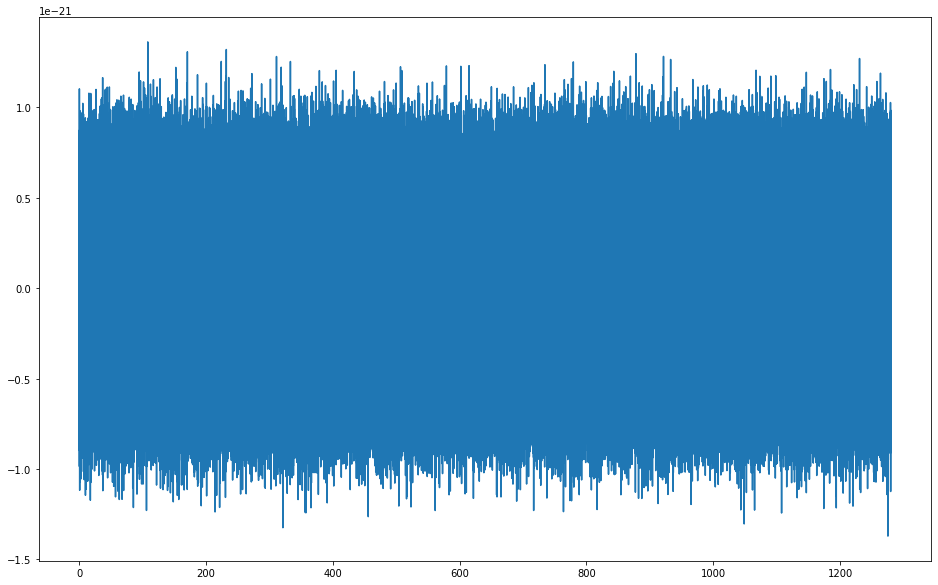

In [34]:
plt.figure(figsize=[16,10])
plt.plot(ts.sample_times,ts)

In [35]:
len(ts)

5242880

In [36]:
int(4/delta_t)

16384

In [37]:
# Estimate the PSD
# We'll choose 4 seconds PSD samples that are overlapped 50 %
seg_len = int(4 / delta_t)
seg_stride = int(seg_len / 2)
estimated_psd = pycbc.psd.welch(ts,
                      seg_len=seg_len,
                      seg_stride=seg_stride)

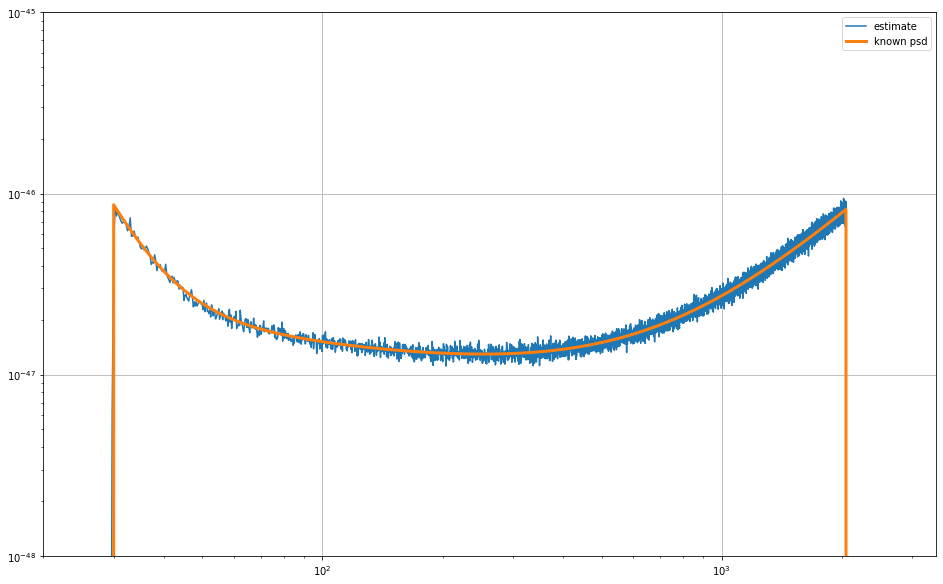

In [38]:
plt.figure(figsize=[16,10])
pp.loglog(estimated_psd.sample_frequencies, estimated_psd, label='estimate')
pp.loglog(psd.sample_frequencies, psd, linewidth=3, label='known psd')
pp.xlim(xmin=20)
pp.ylim(1e-48, 1e-45)
pp.legend()
pp.grid()
pp.show()

In [39]:
psd.sample_frequencies[()]

array([0.0000000e+00, 6.2500000e-02, 1.2500000e-01, ..., 2.0478750e+03,
       2.0479375e+03, 2.0480000e+03])

In [40]:
psd[()]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       8.17917846e-47, 8.17961678e-47, 0.00000000e+00])

In [41]:
%matplotlib inline

# Read in the data around GW150914
from pycbc.catalog import Merger
import pylab

m = Merger('GW150914')

data = {}
for ifo in ['H1', 'L1']:
    data[ifo] = m.strain(ifo)

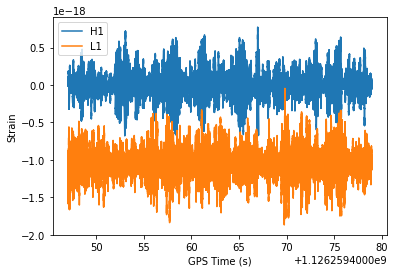

In [42]:
for ifo in data:
    pylab.plot(data[ifo].sample_times, data[ifo], label=ifo)

pylab.ylabel('Strain')
pylab.xlabel('GPS Time (s)')
pylab.legend()
pylab.show()

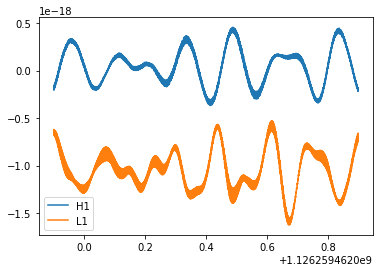

In [43]:
for ifo in data:
    # The time slice method can give just a portion of the time
    # series using GPS start and stop times
    zoom = data[ifo].time_slice(m.time - 0.5, m.time + 0.5)
    pylab.plot(zoom.sample_times, zoom, label=ifo)

pylab.legend()
pylab.show()

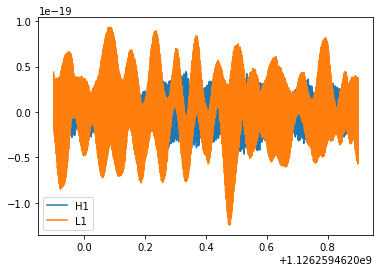

In [44]:
for ifo in data:
    # Apply a highpass filter to the data. This suppresses the low
    # frequency content of the data. We choose here a finite-impulse-response (FIR).
    # Options
    # 1) highpass frequency
    # 2) half sample length of highpass filter 
    #(higher value will give less ripple in passband)
    high_data = data[ifo].highpass_fir(15, 512) # Highpass point is 15 Hz
    
    # The time slice method can give just a portion of the time
    # series using GPS start and stop times
    zoom = high_data.time_slice(m.time - 0.5, m.time + 0.5)
    pylab.plot(zoom.sample_times, zoom, label=ifo)

pylab.legend()
pylab.show()